In [59]:
!pip install py2neo pandas matplotlib

In [64]:
from py2neo import Graph
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_colwidth', 100)

In [65]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "neo"))

In [66]:
popular_authors_query = """
MATCH (a:Tourist)
RETURN a.name, size((a)-[]->()) AS activitynum
ORDER BY activitynum DESC
"""

graph.run(popular_authors_query).to_data_frame()

,a.name,activitynum
0,Tourist,1739
1,Explorer,45
2,Travel_Learner,0


In [67]:
popular_Activity_query = """
MATCH (a:Activity)
RETURN a.name, size((a)-[]-()) AS activitynum
ORDER BY activitynum DESC
"""

graph.run(popular_Activity_query).to_data_frame()

,a.name,activitynum
0,LocalFood,806
1,Food_Beverages,225
2,Sporting,198
3,Specific_Activity,184
4,Festival,108
5,Information,0
6,Park,0


In [68]:
popular_Event_query = """
MATCH (a:Event)
RETURN a.name, size((a)-[]-()) AS activitynum
ORDER BY activitynum DESC
"""

graph.run(popular_Event_query).to_data_frame()

,a.name,activitynum
0,LocalLife,577
1,Specific_Event,253
2,CostalTide,217
3,History,198
4,WildLife,48
5,RoadTrip,38


In [19]:
popular_POI_query = """
MATCH (a:POI)
RETURN a.name, size((a)-[]-()) AS activitynum
ORDER BY activitynum DESC
"""

graph.run(popular_POI_query).to_data_frame()

,a.name,activitynum
0,Nature,695
1,Cultural,267
2,Specific_Attraction,193
3,Entertainment,52
4,Beaches,0
5,POI_Park,0


In [11]:
result = {"label": [], "count": []}
for label in graph.run("CALL db.labels()").to_series():
    query = f"MATCH (:`{label}`) RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["label"].append(label)
    result["count"].append(count)
nodes_df = pd.DataFrame(data=result)
nodes_df.sort_values("count")

,label,count
0,Accommodation,1
5,Transport,2
1,Tourist,3
3,Event,6
4,POI,6
6,Information,6
2,Activity,7


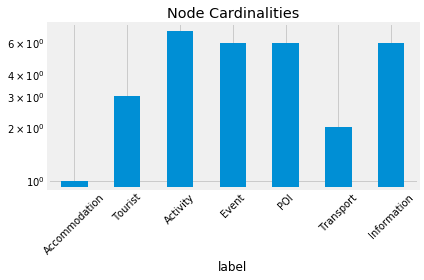

In [12]:
nodes_df.plot(kind='bar', x='label', y='count', legend=None, title="Node Cardinalities")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
result = {"relType": [], "count": []}
for relationship_type in graph.run("CALL db.relationshipTypes()").to_series():
    query = f"MATCH ()-[:`{relationship_type}`]->() RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["relType"].append(relationship_type)
    result["count"].append(count)
rels_df = pd.DataFrame(data=result)
rels_df.sort_values("count")

,relType,count
7,AR_4160,52
15,AR_11393,105
5,AR_14406,112
13,AR_9532,114
3,AR_8700,128
2,AR_1661,135
8,AR_19868,153
1,AR_145,160
11,AR_279,171
4,AR_2274,192


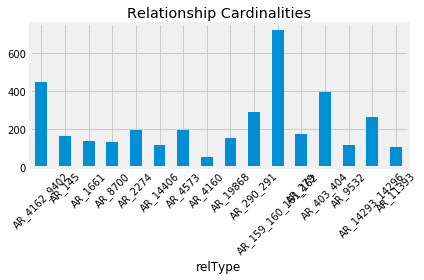

In [15]:
rels_df.plot(kind='bar', x='relType', y='count', legend=None, title="Relationship Cardinalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
query = """
MATCH (n)
RETURN size((n)-[]->()) AS citations
"""

citation_df = graph.run(query).to_data_frame()
citation_df.describe([.25, .5, .75, .9, .99])

,citations
count,31.000
mean,117.065
std,357.815
min,0.000
25%,0.000
50%,16.000
75%,39.500
90%,144.000
99%,1540.700
max,1739.000


In [20]:
Rank_POI_query = """
CALL algo.pageRank.stream('POI', 'AR_4573', {iterations:20, dampingFactor:0.85})
YIELD nodeId, score
RETURN algo.getNodeById(nodeId).name AS page, score
ORDER BY score DESC
"""

graph.run(Rank_POI_query).to_data_frame()

,page,score
0,Cultural,0.278
1,Specific_Attraction,0.150
2,Beaches,0.150
3,Entertainment,0.150
4,Nature,0.150
5,POI_Park,0.150


In [34]:
RankPOI_query = """
CALL algo.pageRank.stream('', '', {iterations:20, dampingFactor:0.85})
YIELD nodeId, score
RETURN algo.getNodeById(nodeId).name AS POI, score
ORDER BY score DESC
"""

graph.run(RankPOI_query).to_data_frame()

,POI,score
0,LocalFood,4.596
1,LocalLife,4.096
2,Cultural,3.885
3,Nature,0.603
4,Specific_Event,0.407
5,Specific_Activity,0.256
6,Food_Beverages,0.238
7,Accomodation,0.179
8,Sporting,0.179
9,CostalTide,0.166


In [33]:
Traingles_query = """
CALL algo.triangle.stream("","")
YIELD nodeA, nodeB, nodeC
RETURN algo.getNodeById(nodeA).name AS nodeA,
algo.getNodeById(nodeB).name AS nodeB,
algo.getNodeById(nodeC).name AS nodeC
"""

graph.run(Traingles_query).to_data_frame()

,nodeA,nodeB,nodeC
0,Food_Beverages,CostalTide,Tourist
1,Food_Beverages,CostalTide,Transport_SELF
2,Food_Beverages,Tourist,Transport_SELF
3,Festival,Tourist,Transport_SELF
4,Festival,Tourist,Cultural
5,Festival,Transport_SELF,Cultural
6,LocalFood,CostalTide,Tourist
7,LocalFood,CostalTide,Transport_SELF
8,LocalFood,LocalLife,Explorer
9,LocalFood,LocalLife,Tourist


In [36]:
Clusters_query = """
CALL algo.triangleCount.stream('', '')
YIELD nodeId, triangles, coefficient
WHERE coefficient > 0
RETURN algo.getNodeById(nodeId).name AS Node, coefficient
ORDER BY coefficient DESC
"""

graph.run(Clusters_query).to_data_frame()

,Node,coefficient
0,Festival,1.000
1,Food_Beverages,1.000
2,History,1.000
3,RoadTrip,1.000
4,WildLife,1.000
5,Accomodation,1.000
6,Specific_Attraction,1.000
7,Entertainment,1.000
8,CostalTide,0.833
9,Sporting,0.800


In [37]:
Strongly_Connected_Component_query = """
CALL algo.scc.stream("", "")
YIELD nodeId, partition
RETURN partition, collect(algo.getNodeById(nodeId).name) AS Nodes
ORDER BY size(Nodes) DESC
"""

graph.run(Strongly_Connected_Component_query).to_data_frame()

,Nodes,partition
0,"[LocalFood, LocalLife, Cultural]",26
1,[Festival],0
2,[Food_Beverages],1
3,[Information],2
4,[Park],4
5,[Sporting],5
6,[CostalTide],6
7,[History],7
8,[RoadTrip],9
9,[WildLife],10


In [40]:
Strongly_Connected_Component_query = """
CALL algo.scc.stream("POI", "")
YIELD nodeId, partition
RETURN partition, collect(algo.getNodeById(nodeId).name) AS Nodes
ORDER BY size(Nodes) DESC
"""

graph.run(Strongly_Connected_Component_query).to_data_frame()

,Nodes,partition
0,[Specific_Attraction],0
1,[Beaches],1
2,[Cultural],2
3,[Entertainment],3
4,[Nature],4
5,[POI_Park],5


In [41]:
Strongly_Connected_Component_query = """
CALL algo.scc.stream("Activity", "")
YIELD nodeId, partition
RETURN partition, collect(algo.getNodeById(nodeId).name) AS Nodes
ORDER BY size(Nodes) DESC
"""

graph.run(Strongly_Connected_Component_query).to_data_frame()

,Nodes,partition
0,[Festival],0
1,[Food_Beverages],1
2,[Information],2
3,[LocalFood],3
4,[Park],4
5,[Sporting],5
6,[Specific_Activity],6


In [39]:
Connected_Component_query = """
CALL algo.unionFind.stream("POI", "")
YIELD nodeId,setId
RETURN setId, collect(algo.getNodeById(nodeId).name) AS Nodes
ORDER BY size(Nodes) DESC
"""

graph.run(Connected_Component_query).to_data_frame()

,Nodes,setId
0,"[Specific_Attraction, Nature]",0
1,"[Cultural, Entertainment]",2
2,[Beaches],1
3,[POI_Park],5


In [42]:
Connected_Component_query = """
CALL algo.unionFind.stream("Activity", "")
YIELD nodeId,setId
RETURN setId, collect(algo.getNodeById(nodeId).name) AS Nodes
ORDER BY size(Nodes) DESC
"""

graph.run(Connected_Component_query).to_data_frame()

,Nodes,setId
0,"[Sporting, Specific_Activity]",5
1,[Festival],0
2,[Food_Beverages],1
3,[Information],2
4,[LocalFood],3
5,[Park],4


In [43]:
Connected_Component_query = """
CALL algo.unionFind.stream("Event", "")
YIELD nodeId,setId
RETURN setId, collect(algo.getNodeById(nodeId).name) AS Nodes
ORDER BY size(Nodes) DESC
"""

graph.run(Connected_Component_query).to_data_frame()

,Nodes,setId
0,[CostalTide],0
1,[History],1
2,[LocalLife],2
3,[RoadTrip],3
4,[WildLife],4
5,[Specific_Event],5


In [44]:
Connected_Component_query = """
CALL algo.unionFind.stream("", "")
YIELD nodeId,setId
RETURN setId, collect(algo.getNodeById(nodeId).name) AS Nodes
ORDER BY size(Nodes) DESC
"""

graph.run(Connected_Component_query).to_data_frame()

,Nodes,setId
0,"[Festival, Food_Beverages, LocalFood, Sporting, CostalTide, History, LocalLife, RoadTrip, WildLi...",0
1,[Information],2
2,[Park],4
3,[Travel_Learner],12
4,[Specific_Hotel],19
5,[Specific_Restaurant],20
6,[Info_Specific_Attraction],21
7,[Social_Media],23
8,[Info_Specific_Event],24
9,[Beaches],25


In [57]:
ClusterbyLouvain_query = """
CALL algo.louvain.stream("", "")
YIELD nodeId, communities
RETURN algo.getNodeById(nodeId).name AS Nodes, communities
"""

graph.run(ClusterbyLouvain_query).to_data_frame()

,Nodes,communities
0,Festival,None
1,Food_Beverages,None
2,Information,None
3,LocalFood,None
4,Park,None
5,Sporting,None
6,CostalTide,None
7,History,None
8,LocalLife,None
9,RoadTrip,None


In [77]:
similarity_jaccard_query = """
MATCH (e1:Event {name: 'LocalLife'})-[]-(p:Tourist)
WITH e1, collect(id(p)) AS e1Tourist
MATCH (e2:Event)-[]-(p2:Tourist) WHERE e1 <> e2
WITH e1, e1Tourist, e2, collect(id(p2)) AS e2Tourist
RETURN e1.name AS from,
       e2.name AS to,
       algo.similarity.jaccard(e1Tourist, e2Tourist) AS similarity
ORDER BY similarity DESC
"""

graph.run(similarity_jaccard_query).to_data_frame()

,from,similarity,to
0,LocalLife,0.005,WildLife
1,LocalLife,0.005,RoadTrip
2,LocalLife,0.004,CostalTide
3,LocalLife,0.003,History
4,LocalLife,0.003,Specific_Event


In [78]:
similarity_jaccard_query = """
MATCH (e1:Event)-[]-(p:Tourist)
WITH e1, collect(id(p)) AS e1Tourist
MATCH (e2:Event)-[]-(p2:Tourist) WHERE e1 <> e2
WITH e1, e1Tourist, e2, collect(id(p2)) AS e2Tourist
RETURN e1.name AS from,
       e2.name AS to,
       algo.similarity.jaccard(e1Tourist, e2Tourist) AS similarity
ORDER BY similarity DESC
"""

graph.run(similarity_jaccard_query).to_data_frame()

,from,similarity,to
0,RoadTrip,0.029,WildLife
1,WildLife,0.029,RoadTrip
2,CostalTide,0.013,WildLife
3,WildLife,0.013,CostalTide
4,CostalTide,0.012,RoadTrip
5,RoadTrip,0.012,CostalTide
6,History,0.009,WildLife
7,WildLife,0.009,History
8,History,0.009,RoadTrip
9,RoadTrip,0.009,History


In [79]:
similarity_jaccard_query = """
MATCH (a1:Activity)-[]-(p:Tourist)
WITH a1, collect(id(p)) AS a1Tourist
MATCH (a2:Activity)-[]-(p2:Tourist) WHERE a1 <> a2
WITH a1, a1Tourist, a2, collect(id(p2)) AS a2Tourist
RETURN a1.name AS from,
       a2.name AS to,
       algo.similarity.jaccard(a1Tourist, a2Tourist) AS similarity
ORDER BY similarity DESC
"""

graph.run(similarity_jaccard_query).to_data_frame()

,from,similarity,to
0,Specific_Activity,0.011,Festival
1,Festival,0.011,Specific_Activity
2,Sporting,0.008,Festival
3,Festival,0.008,Sporting
4,Food_Beverages,0.007,Festival
5,Festival,0.007,Food_Beverages
6,Sporting,0.007,Specific_Activity
7,Specific_Activity,0.007,Sporting
8,Food_Beverages,0.006,Specific_Activity
9,Specific_Activity,0.006,Food_Beverages


In [80]:
similarity_jaccard_query = """
MATCH (a1:POI)-[]-(p:Tourist)
WITH a1, collect(id(p)) AS a1Tourist
MATCH (a2:POI)-[]-(p2:Tourist) WHERE a1 <> a2
WITH a1, a1Tourist, a2, collect(id(p2)) AS a2Tourist
RETURN a1.name AS from,
       a2.name AS to,
       algo.similarity.jaccard(a1Tourist, a2Tourist) AS similarity
ORDER BY similarity DESC
"""

graph.run(similarity_jaccard_query).to_data_frame()

,from,similarity,to
0,Cultural,0.009,Entertainment
1,Entertainment,0.009,Cultural
2,Specific_Attraction,0.005,Entertainment
3,Entertainment,0.005,Specific_Attraction
4,Specific_Attraction,0.004,Cultural
5,Cultural,0.004,Specific_Attraction
6,Entertainment,0.004,Nature
7,Nature,0.004,Entertainment
8,Cultural,0.003,Nature
9,Nature,0.003,Cultural


In [103]:
Overlap_similarity_query = """
MATCH (p:POI)-[r]-(Tourist)
WITH {item:id(Tourist), categories: collect(id(p))} as userData
WITH collect(userData) as data
CALL algo.similarity.overlap.stream(data)
YIELD item1, item2, count1, count2, intersection, similarity
WHERE similarity <> 0
RETURN algo.asNode(item1).name AS from, algo.asNode(item2).name AS to,
       count1, count2, intersection, similarity
ORDER BY similarity DESC
"""

graph.run(Overlap_similarity_query).to_data_frame()

,count1,count2,from,intersection,similarity,to
0,36,36,Festival,36,1.000,LocalLife
1,36,517,Festival,36,1.000,Tourist
2,36,302,Festival,36,1.000,Transport_SELF
3,13,36,Entertainment,13,1.000,Festival
4,15,44,Explorer,15,1.000,LocalFood
5,44,517,LocalFood,44,1.000,Tourist
6,44,302,LocalFood,44,1.000,Transport_SELF
7,13,44,Entertainment,13,1.000,LocalFood
8,26,99,Sporting,26,1.000,History
9,15,26,Explorer,15,1.000,Sporting


In [102]:
Overlap_similarity_query = """
MATCH (p:Activity)-[r]-(Tourist)
WITH {item:id(Tourist), categories: collect(id(p))} as userData
WITH collect(userData) as data
CALL algo.similarity.overlap.stream(data)
YIELD item1, item2, count1, count2, intersection, similarity
WHERE similarity <> 0
RETURN algo.asNode(item1).name AS from, algo.asNode(item2).name AS to,
       count1, count2, intersection, similarity
ORDER BY similarity DESC
"""

graph.run(Overlap_similarity_query).to_data_frame()

,count1,count2,from,intersection,similarity,to
0,17,548,Sporting,17,1.000,Tourist
1,16,176,WildLife,16,1.000,LocalLife
2,15,176,Explorer,15,1.000,LocalLife
3,15,548,Explorer,15,1.000,Tourist
4,15,48,Explorer,15,1.000,Transport_Public
5,15,454,Explorer,15,1.000,Transport_SELF
6,17,454,Sporting,17,1.000,Transport_SELF
7,17,33,Sporting,17,1.000,Specific_Event
8,16,91,WildLife,16,1.000,CostalTide
9,15,91,Explorer,15,1.000,CostalTide


In [101]:
Overlap_similarity_query = """
MATCH (p:Event)-[r]-(Tourist)
WITH {item:id(Tourist), categories: collect(id(p))} as userData
WITH collect(userData) as data
CALL algo.similarity.overlap.stream(data)
YIELD item1, item2, count1, count2, intersection, similarity
WHERE similarity <> 0
RETURN algo.asNode(item1).name AS from, algo.asNode(item2).name AS to,
       count1, count2, intersection, similarity
ORDER BY similarity DESC
"""

graph.run(Overlap_similarity_query).to_data_frame()

,count1,count2,from,intersection,similarity,to
0,63,495,Food_Beverages,63,1.000,Tourist
1,63,322,Food_Beverages,63,1.000,Transport_SELF
2,15,495,Explorer,15,1.000,Tourist
3,15,48,Explorer,15,1.000,Transport_Public
4,15,322,Explorer,15,1.000,Transport_SELF
5,15,36,Explorer,15,1.000,Cultural
6,48,495,Transport_Public,48,1.000,Tourist
7,322,495,Transport_SELF,322,1.000,Tourist
8,36,495,Cultural,36,1.000,Tourist
9,99,495,Nature,99,1.000,Tourist


In [100]:
Overlap_similarity_query = """
MATCH (p:Transport)-[r]-(Tourist)
WITH {item:id(Tourist), categories: collect(id(p))} as userData
WITH collect(userData) as data
CALL algo.similarity.overlap.stream(data)
YIELD item1, item2, count1, count2, intersection, similarity
WHERE similarity <> 0
RETURN algo.asNode(item1).name AS from, algo.asNode(item2).name AS to,
       count1, count2, intersection, similarity
ORDER BY similarity DESC
"""

graph.run(Overlap_similarity_query).to_data_frame()

,count1,count2,from,intersection,similarity,to
0,36,63,Festival,36,1.000,Food_Beverages
1,36,249,Festival,36,1.000,LocalFood
2,36,61,Festival,36,1.000,Sporting
3,36,63,Festival,36,1.000,CostalTide
4,36,176,Festival,36,1.000,LocalLife
5,16,36,WildLife,16,1.000,Festival
6,36,137,Festival,36,1.000,Tourist
7,36,96,Festival,36,1.000,Specific_Event
8,36,64,Festival,36,1.000,Cultural
9,13,36,Entertainment,13,1.000,Festival


In [99]:
Link_Btw_query = """
MATCH (p1:POI)
MATCH (p2:POI)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.adamicAdar(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_Btw_query).to_data_frame()

,p1.name,p2.name,score
0,Cultural,Nature,0.424
1,Nature,Cultural,0.424
2,Cultural,Entertainment,0.275
3,Entertainment,Cultural,0.275
4,Entertainment,Nature,0.275
5,Nature,Entertainment,0.275
6,Specific_Attraction,Cultural,0.134
7,Specific_Attraction,Entertainment,0.134
8,Specific_Attraction,Nature,0.134
9,Cultural,Specific_Attraction,0.134


In [104]:
Link_Btw_query = """
MATCH (p1:Activity)
MATCH (p2:Activity)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.adamicAdar(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_Btw_query).to_data_frame()

,p1.name,p2.name,score
0,LocalFood,Specific_Activity,0.653
1,Specific_Activity,LocalFood,0.653
2,LocalFood,Sporting,0.625
3,Sporting,LocalFood,0.625
4,Sporting,Specific_Activity,0.473
5,Specific_Activity,Sporting,0.473
6,Food_Beverages,LocalFood,0.461
7,LocalFood,Food_Beverages,0.461
8,Festival,LocalFood,0.454
9,LocalFood,Festival,0.454


In [105]:
Link_Btw_query = """
MATCH (p1:Event)
MATCH (p2:Event)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.adamicAdar(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_Btw_query).to_data_frame()

,p1.name,p2.name,score
0,LocalLife,Specific_Event,0.622
1,Specific_Event,LocalLife,0.622
2,CostalTide,LocalLife,0.424
3,CostalTide,WildLife,0.424
4,CostalTide,Specific_Event,0.424
5,LocalLife,CostalTide,0.424
6,LocalLife,WildLife,0.424
7,WildLife,CostalTide,0.424
8,WildLife,LocalLife,0.424
9,WildLife,Specific_Event,0.424


In [107]:
Link_CN_query = """
MATCH (p1:Event)
MATCH (p2:Event)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.commonNeighbors(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_CN_query).to_data_frame()

,p1.name,p2.name,score
0,LocalLife,Specific_Event,4.000
1,Specific_Event,LocalLife,4.000
2,CostalTide,LocalLife,3.000
3,CostalTide,WildLife,3.000
4,CostalTide,Specific_Event,3.000
5,LocalLife,CostalTide,3.000
6,LocalLife,WildLife,3.000
7,WildLife,CostalTide,3.000
8,WildLife,LocalLife,3.000
9,WildLife,Specific_Event,3.000


In [108]:
Link_CN_query = """
MATCH (p1:POI)
MATCH (p2:POI)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.commonNeighbors(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_CN_query).to_data_frame()

,p1.name,p2.name,score
0,Cultural,Nature,3.000
1,Nature,Cultural,3.000
2,Cultural,Entertainment,2.000
3,Entertainment,Cultural,2.000
4,Entertainment,Nature,2.000
5,Nature,Entertainment,2.000
6,Specific_Attraction,Cultural,1.000
7,Specific_Attraction,Entertainment,1.000
8,Specific_Attraction,Nature,1.000
9,Cultural,Specific_Attraction,1.000


In [109]:
Link_CN_query = """
MATCH (p1:Activity)
MATCH (p2:Activity)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.commonNeighbors(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_CN_query).to_data_frame()

,p1.name,p2.name,score
0,LocalFood,Sporting,4.000
1,LocalFood,Specific_Activity,4.000
2,Sporting,LocalFood,4.000
3,Specific_Activity,LocalFood,4.000
4,Festival,LocalFood,3.000
5,Food_Beverages,LocalFood,3.000
6,LocalFood,Festival,3.000
7,LocalFood,Food_Beverages,3.000
8,Sporting,Specific_Activity,3.000
9,Specific_Activity,Sporting,3.000


In [110]:
Link_PA_query = """
MATCH (p1:Activity)
MATCH (p2:Activity)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.preferentialAttachment(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_PA_query).to_data_frame()

,p1.name,p2.name,score
0,Food_Beverages,LocalFood,181350.000
1,LocalFood,Food_Beverages,181350.000
2,LocalFood,Sporting,159588.000
3,Sporting,LocalFood,159588.000
4,LocalFood,Specific_Activity,148304.000
5,Specific_Activity,LocalFood,148304.000
6,Festival,LocalFood,87048.000
7,LocalFood,Festival,87048.000
8,Food_Beverages,Sporting,44550.000
9,Sporting,Food_Beverages,44550.000


In [111]:
Link_PA_query = """
MATCH (p1:POI)
MATCH (p2:POI)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.preferentialAttachment(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_PA_query).to_data_frame()

,p1.name,p2.name,score
0,Cultural,Nature,185565.000
1,Nature,Cultural,185565.000
2,Specific_Attraction,Nature,134135.000
3,Nature,Specific_Attraction,134135.000
4,Specific_Attraction,Cultural,51531.000
5,Cultural,Specific_Attraction,51531.000
6,Entertainment,Nature,36140.000
7,Nature,Entertainment,36140.000
8,Cultural,Entertainment,13884.000
9,Entertainment,Cultural,13884.000


In [112]:
Link_PA_query = """
MATCH (p1:Event)
MATCH (p2:Event)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.preferentialAttachment(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_PA_query).to_data_frame()

,p1.name,p2.name,score
0,LocalLife,Specific_Event,145981.000
1,Specific_Event,LocalLife,145981.000
2,CostalTide,LocalLife,125209.000
3,LocalLife,CostalTide,125209.000
4,History,LocalLife,114246.000
5,LocalLife,History,114246.000
6,CostalTide,Specific_Event,54901.000
7,Specific_Event,CostalTide,54901.000
8,History,Specific_Event,50094.000
9,Specific_Event,History,50094.000


In [113]:
Link_PA_query = """
MATCH (p1:Event)
MATCH (p2:POI)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.preferentialAttachment(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_PA_query).to_data_frame()

,p1.name,p2.name,score
0,LocalLife,Nature,401015.000
1,Specific_Event,Nature,175835.000
2,LocalLife,Cultural,154059.000
3,CostalTide,Nature,150815.000
4,History,Nature,137610.000
5,LocalLife,Specific_Attraction,111361.000
6,Specific_Event,Cultural,67551.000
7,CostalTide,Cultural,57939.000
8,History,Cultural,52866.000
9,Specific_Event,Specific_Attraction,48829.000


In [114]:
Link_PA_query = """
MATCH (p1:Activity)
MATCH (p2:POI)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.preferentialAttachment(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_PA_query).to_data_frame()

,p1.name,p2.name,score
0,LocalFood,Nature,560170.000
1,LocalFood,Cultural,215202.000
2,Food_Beverages,Nature,156375.000
3,LocalFood,Specific_Attraction,155558.000
4,Sporting,Nature,137610.000
5,Specific_Activity,Nature,127880.000
6,Festival,Nature,75060.000
7,Food_Beverages,Cultural,60075.000
8,Sporting,Cultural,52866.000
9,Specific_Activity,Cultural,49128.000


In [115]:
Link_PA_query = """
MATCH (p1:Event)
MATCH (p2:Activity)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.preferentialAttachment(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_PA_query).to_data_frame()

,p1.name,p2.name,score
0,LocalLife,LocalFood,465062.000
1,Specific_Event,LocalFood,203918.000
2,CostalTide,LocalFood,174902.000
3,History,LocalFood,159588.000
4,LocalLife,Food_Beverages,129825.000
5,LocalLife,Sporting,114246.000
6,LocalLife,Specific_Activity,106168.000
7,LocalLife,Festival,62316.000
8,Specific_Event,Food_Beverages,56925.000
9,Specific_Event,Sporting,50094.000


In [119]:
Link_TN_query = """
MATCH (p1:Event)
MATCH (p2:Activity)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.totalNeighbors(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_TN_query).to_data_frame()

,p1.name,p2.name,score
0,CostalTide,LocalFood,12.000
1,Specific_Event,LocalFood,12.000
2,LocalLife,LocalFood,11.000
3,WildLife,LocalFood,11.000
4,History,LocalFood,10.000
5,RoadTrip,LocalFood,10.000
6,LocalLife,Sporting,8.000
7,LocalLife,Specific_Activity,8.000
8,CostalTide,Sporting,7.000
9,CostalTide,Specific_Activity,7.000


In [120]:
Link_TN_query = """
MATCH (p1:Event)
MATCH (p2:POI)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.totalNeighbors(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_TN_query).to_data_frame()

,p1.name,p2.name,score
0,CostalTide,Nature,9.000
1,History,Nature,9.000
2,LocalLife,Cultural,9.000
3,LocalLife,Nature,9.000
4,Specific_Event,Nature,9.000
5,RoadTrip,Nature,8.000
6,WildLife,Nature,8.000
7,Specific_Event,Cultural,8.000
8,CostalTide,Cultural,7.000
9,History,Cultural,7.000


In [121]:
Link_TN_query = """
MATCH (p1:Activity)
MATCH (p2:POI)
 WHERE p1 <> p2 
RETURN p1.name, p2.name, algo.linkprediction.totalNeighbors(p1, p2) AS score
ORDER BY score DESC
"""

graph.run(Link_TN_query).to_data_frame()

,p1.name,p2.name,score
0,LocalFood,Nature,14.000
1,LocalFood,Cultural,13.000
2,LocalFood,Specific_Attraction,10.000
3,LocalFood,Beaches,10.000
4,LocalFood,Entertainment,10.000
5,Sporting,Nature,10.000
6,LocalFood,POI_Park,10.000
7,Sporting,Cultural,9.000
8,Specific_Activity,Cultural,9.000
9,Festival,Nature,9.000
